# 02. Data Exploration

We will find some insights in our dataset. In particular, we will looking at the following things:

- Statistics in our training dataset
- The distribution of Word length
- Frequent words for disaster and non-disaster tweets

## General Characteristics of Dataset

In [1]:
import pandas as pd
train_df = pd.read_csv("data/cleaned-tokenized-train-tweets.csv", sep="|")
train_df.head()

,id,keyword,location,text,target,tokenized_clean_text
0,0,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,"['deed', 'reason', 'earthquake', 'may', 'allah..."
1,1,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,"['forest', 'fire', 'near', 'la', 'ronge', 'sas..."
2,2,NaN,NaN,All residents asked to 'shelter in place' are ...,1,"['resident', 'asked', 'place', 'notified', 'of..."
3,3,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"['people', 'receive', 'wildfire', 'evacuation'..."
4,4,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,"['got', 'sent', 'photo', 'ruby', 'alaska', 'sm..."


There are 18,473 train data. 7,944 are postitive (disaster tweets)

In [16]:
print("Total train data: ", train_df.shape[0])
print("Total positive data (or disaster tweets): ", train_df[train_df["target"] == 1].shape[0])


Total train data:  18473
Total positive data (or disaster tweets):  7944


To find the statistics relevant to number of unique words, we use the following code

In [14]:
import ast
docs = []
for row in train_df.itertuples():
    docs.extend(ast.literal_eval(row.tokenized_clean_text))

freq = {}
for word in docs:
    freq[word] = freq.get(word, 0) + 1

# create bins
bins = {"1": 0, "2 - 50": 0, "51 - 100": 0, "101 - 200": 0, "201 - 300": 0, "301+": 0}
for cnt in freq.values():
    if cnt == 1:
        bins["1"] = bins.get("1", 0) + 1
    elif cnt > 1 and cnt <= 50:
        bins["2 - 50"] = bins.get("2 - 50", 0) + 1
    elif cnt > 51 and cnt <= 100:
        bins["51 - 100"] = bins.get("51 - 100", 0) + 1
    elif cnt > 100 and cnt <= 200:
        bins["101 - 200"] = bins.get("101 - 200", 0) + 1
    elif cnt > 200 and cnt <= 300:
        bins["201 - 300"] = bins.get("201 - 300", 0) + 1
    else:
        bins["301+"] = bins.get("301+", 0) + 1

print("Total unique words: ", sum(bins.values()))
print("Number of words for each frequency of appearance: ",  bins)
print("Total unique words with frequency > 1: ", sum([val for val in bins.values() if bins != "1"])) 


Total unique words:  17107
Number of words for each frequency of appearance:  {'1': 3119, '2 - 50': 13304, '51 - 100': 434, '101 - 200': 167, '201 - 300': 47, '301+': 36}
Total unique words with frequency > 1:  17107


We can also calculate the text length for each tweet. The average length of tweet is 90 words, the lowest length is 2, while the highest length is 201 words

In [18]:
train_df["len_clean_text"] = train_df["tokenized_clean_text"].apply(len)
train_df["len_clean_text"].describe()

count    18473.000000
mean        90.436583
std         33.606124
min          2.000000
25%         66.000000
50%         92.000000
75%        116.000000
max        201.000000
Name: len_clean_text, dtype: float64

Therefore, we summarize some of the key characteristics here:

In [20]:
print("Total train data: ", train_df.shape[0])
print("Total positive data (or disaster tweets): ", train_df[train_df["target"] == 1].shape[0])
print("Total unique words: ", sum(bins.values()))
print("Total unique words with frequency > 1: ", sum([val for val in bins.values() if bins != "1"])) 
print("Avg. length of tweets: ", train_df["len_clean_text"].describe().loc["mean"])
print("Median length of tweets: ", train_df["len_clean_text"].describe().loc["50%"])
print("Maximum length of tweets: ", train_df["len_clean_text"].describe().loc["min"])
print("Minimum length of tweets: ", train_df["len_clean_text"].describe().loc["max"])

Total train data:  18473
Total positive data (or disaster tweets):  7944
Total unique words:  17107
Total unique words with frequency > 1:  17107
Avg. length of tweets:  90.43658312131218
Median length of tweets:  92.0
Maximum length of tweets:  2.0
Minimum length of tweets:  201.0


## Word Distribution

We will plot word distribution for both the negative and positive tweets.

The figure shows that many negative tweets use fewer words, but, in general, both kind of tweets use approximately 75-125 words

In [22]:
# Create negative and positive dataset
neg_df = train_df[train_df["target"] == 0]
pos_df = train_df[train_df["target"] == 1]

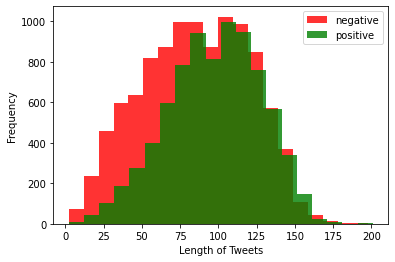

In [21]:
# plot word distribution
import matplotlib.pyplot as plt
fig, axes = plt.subplots(sharex=True)
n, bins, patches = axes.hist(
    x=neg_df["len_clean_text"], bins=20, alpha=0.8, label = "negative", color="r")
n, bins, patches = axes.hist(
    x=pos_df["len_clean_text"], bins=20, alpha=0.8, label="positive", color="g")
plt.xlabel("Length of Tweets")
plt.ylabel("Frequency")
axes.legend()
plt.show()

## Word Cloud

We also want to visualize word cloud of text for each type of target. Big size of word means that there is a high frequency of that word in the dataset. Before we separate the analysis to positive and negative dataset, we find that several words such as *amp*, *new*, *day* are common in both datasets. However, in the positive examples, words tend to be relevant to disaster such as fire, flood, storm, suicide, bomber, spill. Meanwhile, tweets classified as a non-disaster tweet mostly use general tone words or even positive words such as time, love, good, see.

Clearly, we can hypothesize that word usage matters in prediction disaster as real disaster tends to use words that clearly reflected a disaster or any bad events, while in non-disaster tweet use only general words. 

Moreover, as we already showed in the previous section, the length of tweet is also matter, we know that non-disaster tend to use considerable short amount of words compared with real disaster tweet. Hence, in our prediction task, it is useful for leverage the features of words in tweets and lenth of tweets.

In [25]:
neg_docs = []
for row in neg_df.itertuples():
    neg_docs.extend(ast.literal_eval(row.tokenized_clean_text))

pos_docs = []
for row in pos_df.itertuples():
    pos_docs.extend(ast.literal_eval(row.tokenized_clean_text))

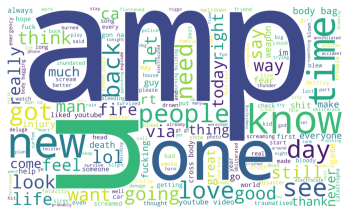

In [28]:
from wordcloud import WordCloud
neg_wordcloud = WordCloud(width=5000, height=3000, 
    background_color="white").generate(" ".join(neg_docs))

plt.imshow(neg_wordcloud)
plt.axis("off")
plt.show()

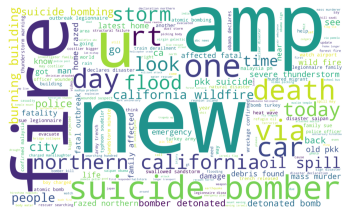

In [29]:
pos_wordcloud = WordCloud(width=5000, height=3000, 
    background_color="white").generate(" ".join(pos_docs))

plt.imshow(pos_wordcloud)
plt.axis("off")
plt.show()